In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

%matplotlib inline


In [8]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [9]:
ibm = pd.read_csv(r"C:\Users\hp\Downloads\archive (14)\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [10]:
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
ibm.shape

(1470, 35)

In [14]:
numeric_cols = ibm.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = ibm.select_dtypes(include=['object']).columns.tolist()

In [15]:
ibm[numeric_cols].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [16]:
ibm[categorical_cols]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [17]:
missing_counts = ibm[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

In [18]:
missing_counts = ibm[categorical_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

In [19]:
ibm[numeric_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
ibm['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

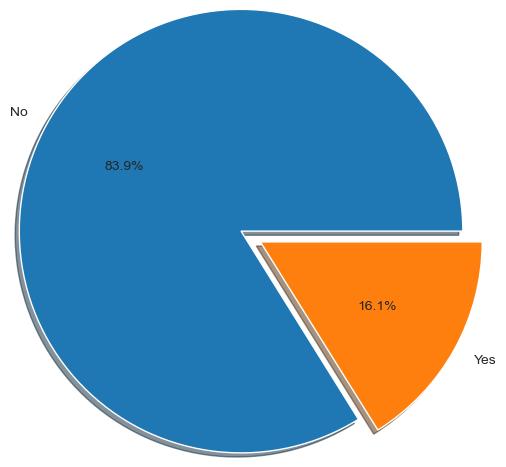

In [21]:
r = ibm.groupby('Attrition')['Attrition'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True);

In [22]:
ibm['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [23]:
ibm['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [24]:
ibm['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [25]:
ibm['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [28]:
ibm.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

ibm = ibm.drop(columns=['StandardHours', 
                          'EmployeeCount', 
                          'Over18',
                        ])

C:\Users\hp\AppData\Local\Temp\ipykernel_7676\3274861032.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax = axes[1],color = "Green",a=ibm["Age"])


<Axes: xlabel='Age', ylabel='Density'>

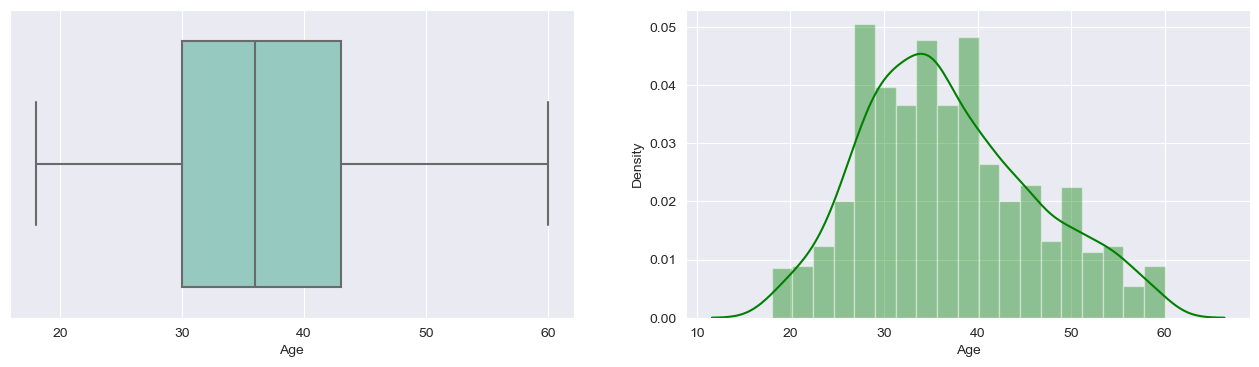

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],palette = "Set3", x = ibm['Age'])
sns.distplot(ax = axes[1],color = "Green",a=ibm["Age"])

C:\Users\hp\AppData\Local\Temp\ipykernel_7676\3188802319.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax = axes[1],color = "Green",a=ibm["MonthlyIncome"])


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

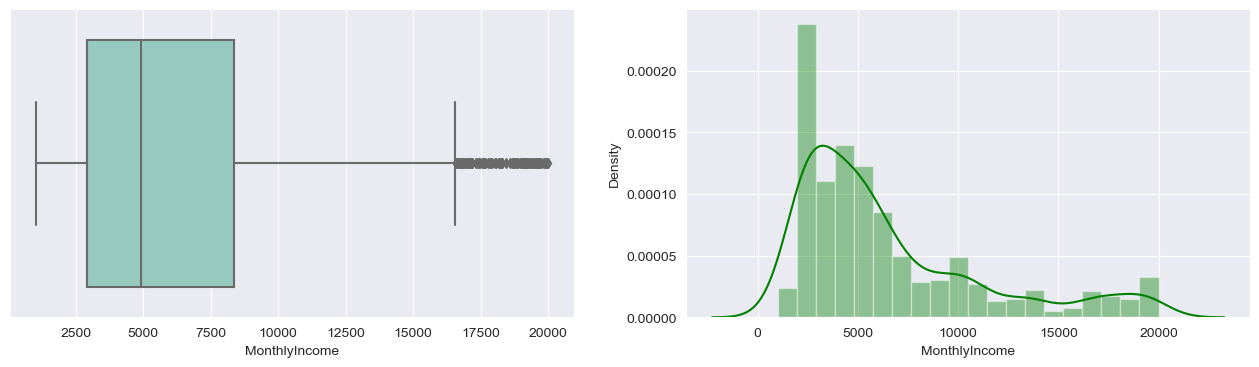

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],palette = "Set3",x = ibm['MonthlyIncome'])
sns.distplot(ax = axes[1],color = "Green",a=ibm["MonthlyIncome"])


In [32]:
len(ibm[ibm['MonthlyIncome']>17500])

81

C:\Users\hp\AppData\Local\Temp\ipykernel_7676\27600988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax = axes[1],color = "Green" ,a=ibm["TotalWorkingYears"])


<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

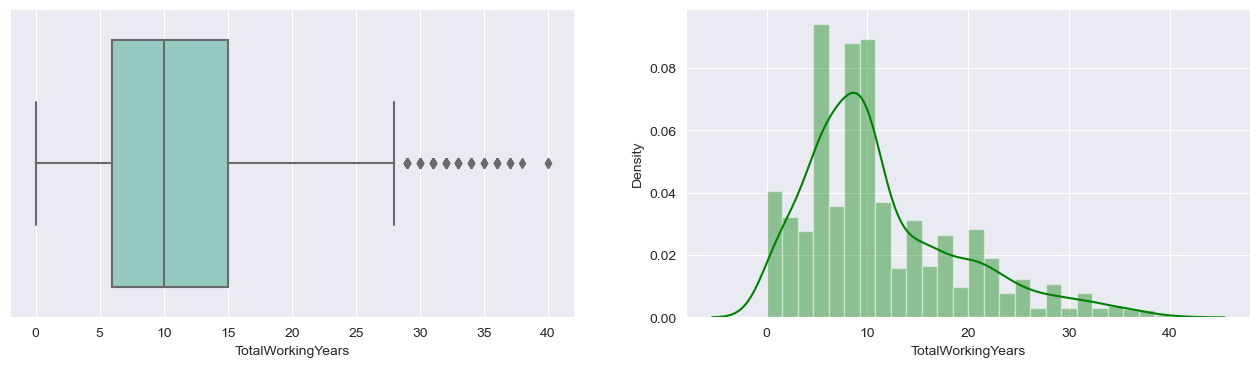

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],palette = "Set3", x = ibm['TotalWorkingYears'])
sns.distplot(ax = axes[1],color = "Green" ,a=ibm["TotalWorkingYears"])

In [34]:
len(ibm[ibm['TotalWorkingYears']>28])

63

C:\Users\hp\AppData\Local\Temp\ipykernel_7676\2434511746.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax = axes[1],color = "Green" ,a=ibm["YearsAtCompany"])


<Axes: xlabel='YearsAtCompany', ylabel='Density'>

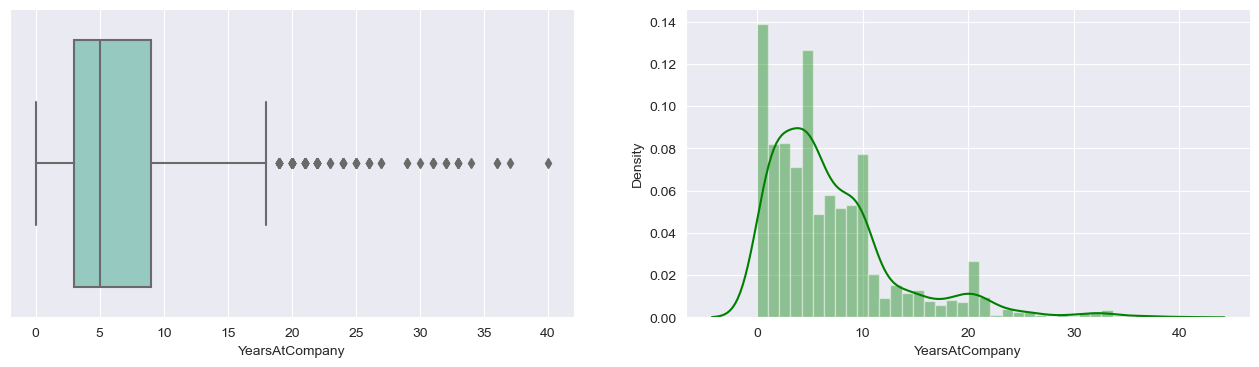

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],palette = "Set3",x = ibm['YearsAtCompany'])
sns.distplot(ax = axes[1],color = "Green" ,a=ibm["YearsAtCompany"])

In [36]:
len(ibm[ibm['YearsAtCompany']>18])

104

C:\Users\hp\AppData\Local\Temp\ipykernel_7676\3400459164.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax = axes[1],color = "Green", a=ibm["YearsSinceLastPromotion"])


<Axes: xlabel='YearsSinceLastPromotion', ylabel='Density'>

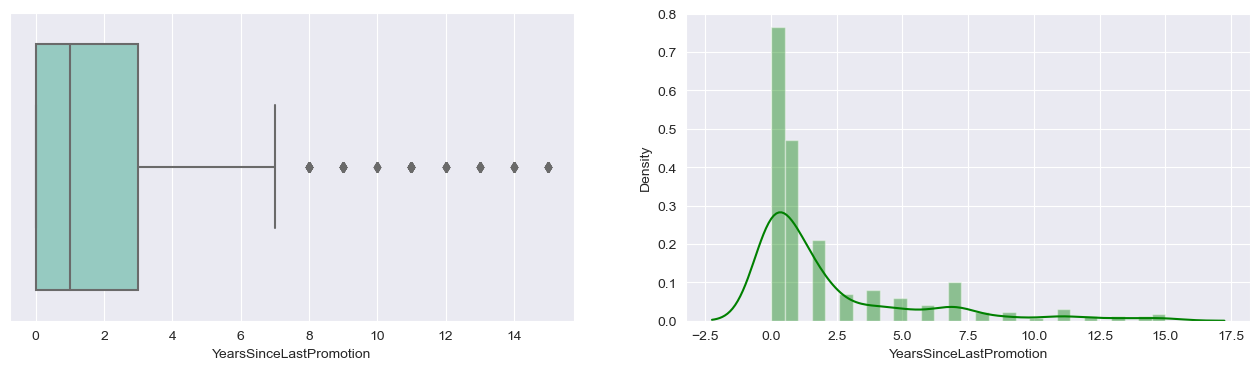

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0], palette = "Set3", x = ibm['YearsSinceLastPromotion'])
sns.distplot(ax = axes[1],color = "Green", a=ibm["YearsSinceLastPromotion"])

In [38]:
len(ibm[ibm['YearsSinceLastPromotion']>7])

107

In [39]:
df = ibm[ibm['YearsSinceLastPromotion']<7]

In [40]:
len(df)

1287

C:\Users\hp\AppData\Local\Temp\ipykernel_7676\2473116747.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")


<Axes: >

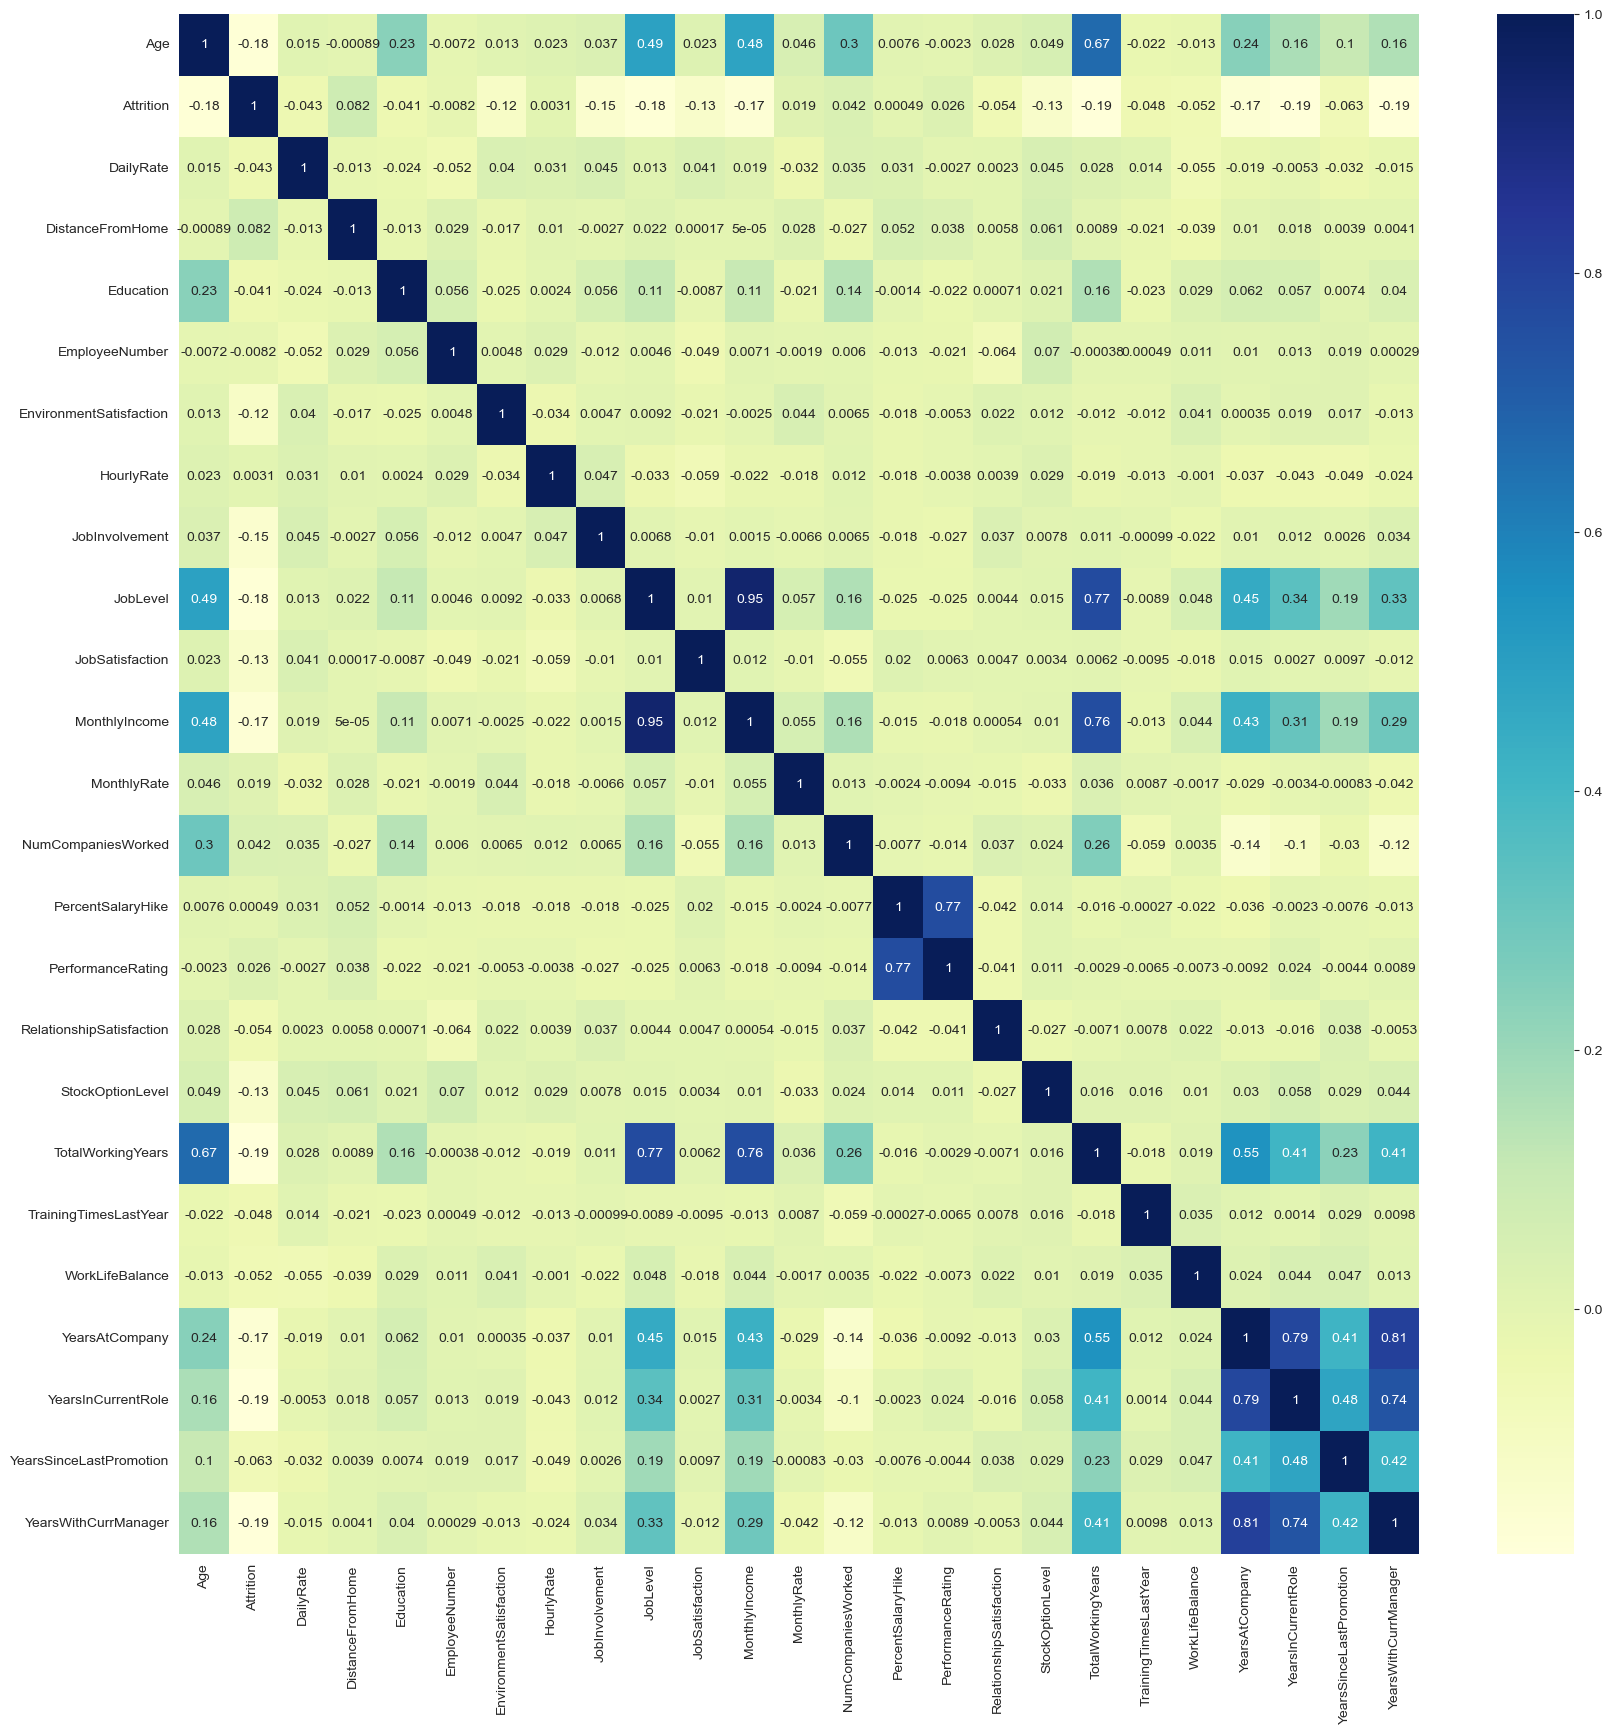

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

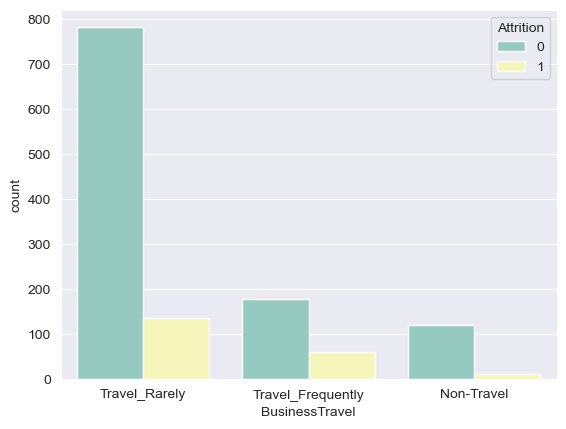

In [42]:
sns.countplot(x='BusinessTravel',palette = "Set3", hue='Attrition', data=df);

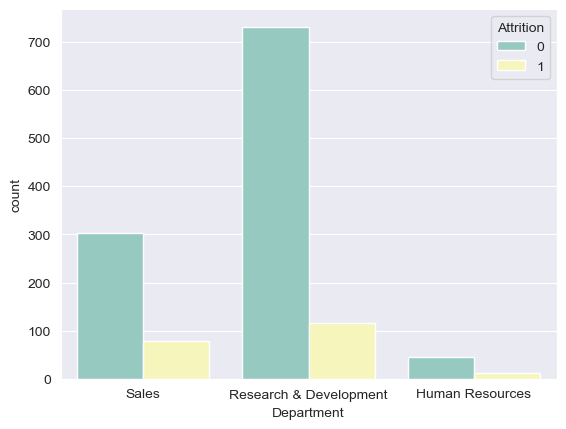

In [43]:
sns.countplot(x='Department', hue='Attrition', palette = "Set3", data=df);

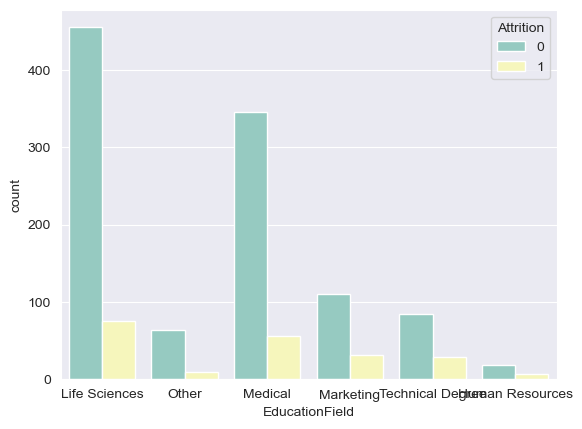

In [44]:
sns.countplot(x='EducationField', hue='Attrition', palette = "Set3", data=df);

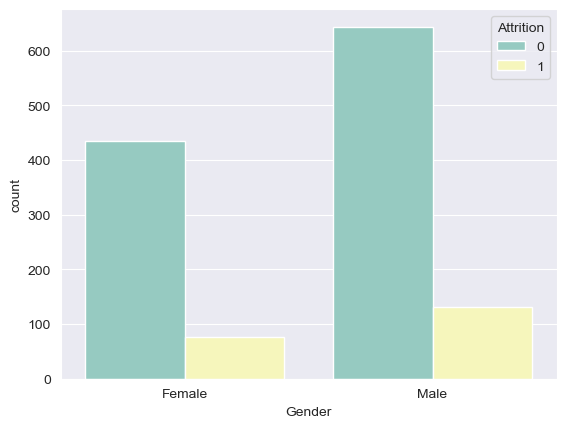

In [45]:
sns.countplot(x='Gender', hue='Attrition', palette = "Set3", data=df);

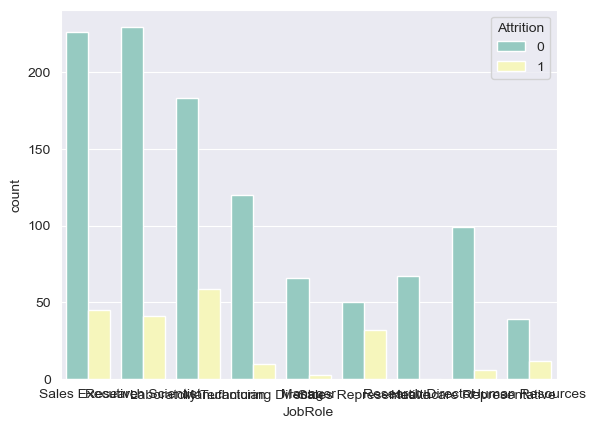

In [46]:
sns.countplot(x='JobRole', hue='Attrition', palette = "Set3", data=df);

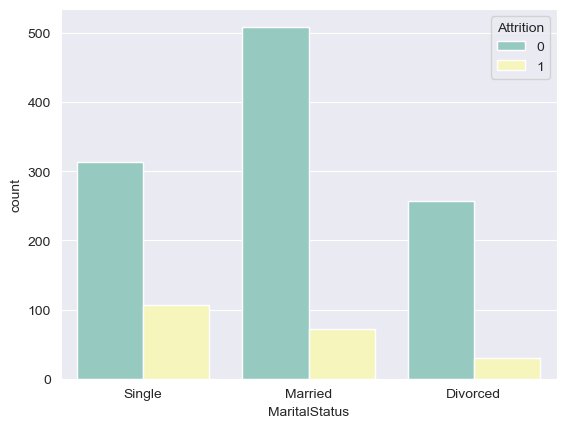

In [47]:
sns.countplot(x='MaritalStatus', hue='Attrition', palette = "Set3", data=df);

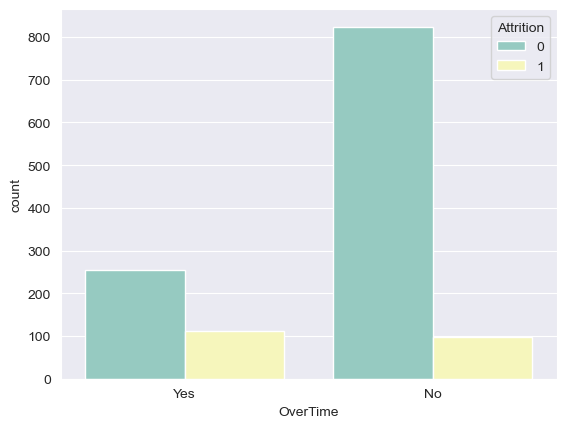

In [48]:
sns.countplot(x='OverTime', hue='Attrition', palette = "Set3", data=df);

In [49]:
df["Attrition"] = LabelEncoder().fit_transform(df['Attrition'])
df["BusinessTravel"] = LabelEncoder().fit_transform(df['BusinessTravel'])
df["Department"] = LabelEncoder().fit_transform(df['Department'])
df["EducationField"] = LabelEncoder().fit_transform(df['EducationField'])
df["Gender"] = LabelEncoder().fit_transform(df['Gender'])
df["JobRole"] = LabelEncoder().fit_transform(df['JobRole'])
df["MaritalStatus"] = LabelEncoder().fit_transform(df['MaritalStatus'])
df["OverTime"] = LabelEncoder().fit_transform(df['OverTime'])

C:\Users\hp\AppData\Local\Temp\ipykernel_7676\3813995068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Attrition"] = LabelEncoder().fit_transform(df['Attrition'])
C:\Users\hp\AppData\Local\Temp\ipykernel_7676\3813995068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BusinessTravel"] = LabelEncoder().fit_transform(df['BusinessTravel'])
C:\Users\hp\AppData\Local\Temp\ipykernel_7676\3813995068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [50]:
numeric_cols.remove('StandardHours')
numeric_cols.remove('EmployeeCount')
df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])

C:\Users\hp\AppData\Local\Temp\ipykernel_7676\3684719789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])


In [51]:
cols = list(df.columns)
cols.remove("Attrition")
sampled,target = SMOTE().fit_resample(df[cols],df["Attrition"])

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(sampled[cols],
                                                 target,
                                                 test_size = 0.3,
                                                 shuffle=True)

Train Accuracy : 0.77 %
Test Accuracy : 0.75 %


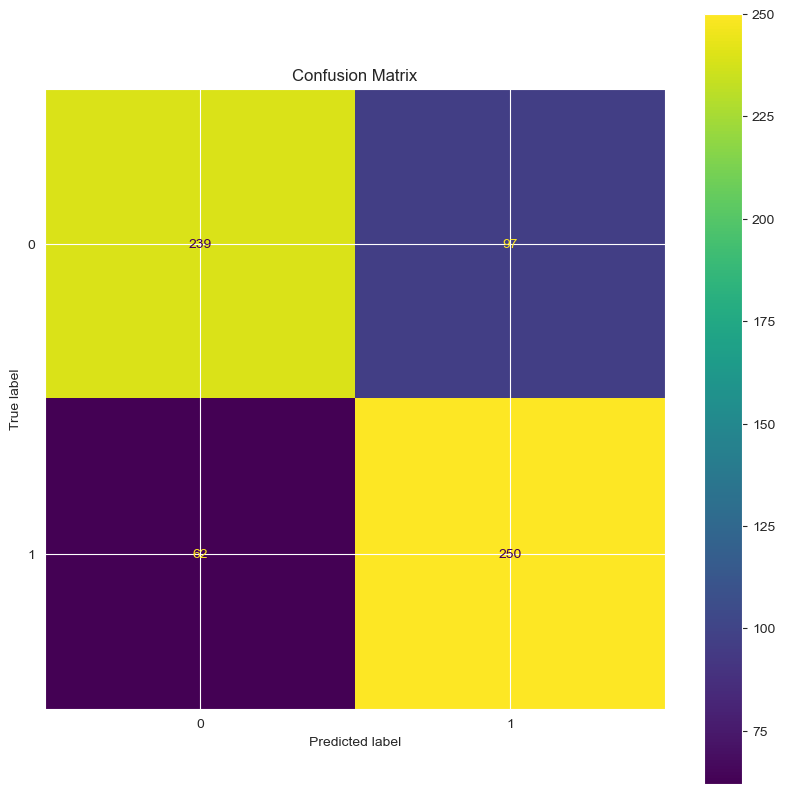

In [53]:
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,logistic_model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

Train Accuracy : 1.00 %
Test Accuracy : 0.92 %


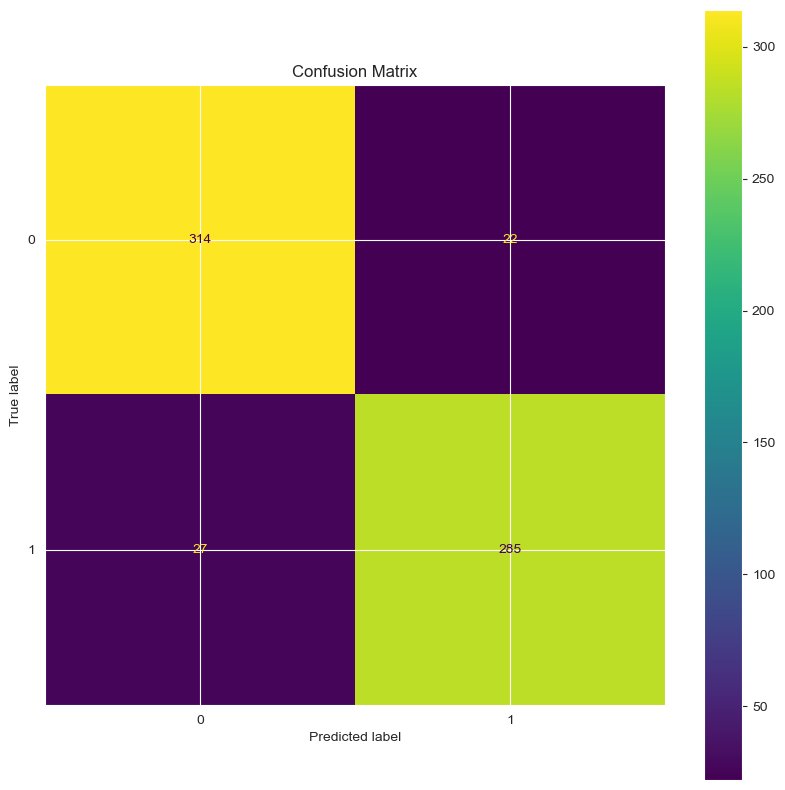

In [54]:
random_forest = RandomForestClassifier(n_estimators=590,
                                       random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

Train Accuracy : 1.00 %
Test Accuracy : 0.93 %


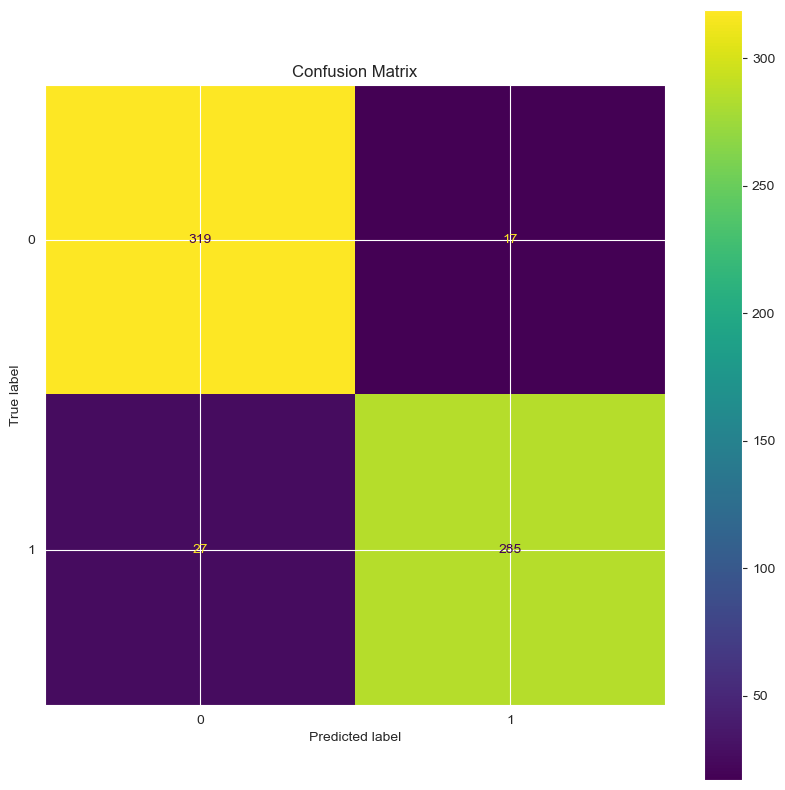

In [55]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.01,n_estimators=2000,use_label_encoder=False,random_state=420).fit(X_train,Y_train)

print("Train Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()